In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import residuez
import pandas as pd
from IPython.display import display

**Ejercicio 3:** 
Considere el sistema
H(z) = 1 −2z−1 + 2z−2 −z−3

$$ H(z) = \frac{ 1-2z^{-1} + 2z^{-2} - z^-3 }{ (1 − z^{-1})(1 − 0, 5z^{−1})(1 − 0, 2^{z−1}) } $$
1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
2. Determine la respuesta al impulso del sistema

**1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema? Paso a paso**
1. Representamos el numerador y el denominador de $H(z)$ como arreglos de coeficientes en potencias de $z^{-1}$.
$$D(z)=(1 − 1.5z^{−1} + 0.5z^{−2})( 1− 0.2z^{-1})= 1− 1.7z^{-1}+0.8z{−2}−0.1z^{−3}$$
Asi que:
$$H(z)=\frac{1−2z^{−1}+2z^{−2}−z^−3}{1−1.7z^{−1}+0.8z^{−2} −0.1z^{−3​}}$$

Como el grado del polinomio del numerador M (3) es igual al grado del denominador N(3), tenemos una fracción impropia. Realizamos una división larga para separar un término constante, que será el término directo K. Para tener que M es menor a N y podes usar fracciones parciales

Dividimos el numerador entre el denominador.Se dividen los coeficientes de la mayor potencia (en este caso z−3):
$$K=\frac{coeficiente \ de \ z^{−3} \ en \ el \ denominador}{ coeficiente \ de \ z^{−3} \ en \ el \ numerador​}=\frac{-1}{-0.1}​=10$$

Este término $K=10$ es la primera parte de nuestra respuesta. Ahora, restamos este término para obtener una fracción propia: $$H(z)=H​(z) - 10$$

$$H(z)=\frac{1−2z^{−1}+2z^{−2}−z^−3}{1−1.7z^{−1}+0.8z^{−2} −0.1z^{−3​}} - 10 \frac{D(z)}{D(z)}$$
Desarrollando miembro a miembro.
$$ H(z) = 10 + \frac{ -9 + 15z^{-1} - 6z^{-2}}{ (1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})} $$
Buscamos las fracciones parciales de la forma:
$$ \frac{-9 + 15z^{-1} - 6z^{-2}}{(1 - z^{-1})(1 - 0.5z^{-1})(1 - 0.2z^{-1})} = \frac{A_1}{1 - z^{-1}} + \frac{A_2}{1 - 0.5z^{-1}} + \frac{A_3}{1 - 0.2z^{-1}}$$


**2. Encontramos las raíces del numerador (los ceros) y las raíces del denominador (los polos).**

$$zeros = np.roots(numerador)$$
$$polos = np.roots(denominador)$$

Usamos los polos $[1. \  0.5 \ 0.2] $ para evaluar en las fracciones parciales:

$$ H(z) = 10 + \frac{0}{1 - z^{-1}} + \frac{5}{1 - 0.5z^{-1}} + \frac{-14}{1 - 0.2z^{-1}}$$

Usando la relacion:
$$x[n]=a^n u[n]$$ 

$$ Aa^n u[n]⟺ \frac{A}{1-z^{-1}}$$

**2. Determine la respuesta al impulso del sistema** 
Obtenemos la repuesta al impulso:

$$h[n]=10δ[n]+5(0.5)^n u[n] − 14(0.2)^n u[n]$$

3. Graficamos los polos y ceros en el plano Z. Un círculo de radio 1 (el "círculo unitario") se dibuja como referencia para el análisis de estabilidad.
4. Conclusión de Estabilidad: El sistema no es estrictamente estable, sino marginalmente estable. Esto se debe a que tiene un polo en $z=1$, que se encuentra sobre el círculo unitario. Los otros dos polos $z=0.5$ y $z=0.2$ están dentro del círculo unitario. Un sistema marginalmente estable no tendrá una respuesta al impulso que decaiga a cero y puede oscilar indefinidamente.



,Tipo,Coeficientes
0,Numerador,"[1, -2, 2, -1]"
1,Denominador,"[1.0, -1.7, 0.8, -0.1]"


,Polos,Magnitud del Polo,Ceros
0,1.0,1.0,1.0000 + 0.0000j
1,0.5,0.5,0.5000 + 0.8660j
2,0.2,0.2,0.5000 + -0.8660j


El sistema es INESTABLE (al menos un polo fuera del círculo unitario).
Resultados de la Expansión en Fracciones Parciales


,Polos (P),Residuos (R)
0,0.2,-1.400000e+01
1,0.5,5.000000e+00
2,1.0,-8.881784e-15


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Términos Directos (K): [10.]


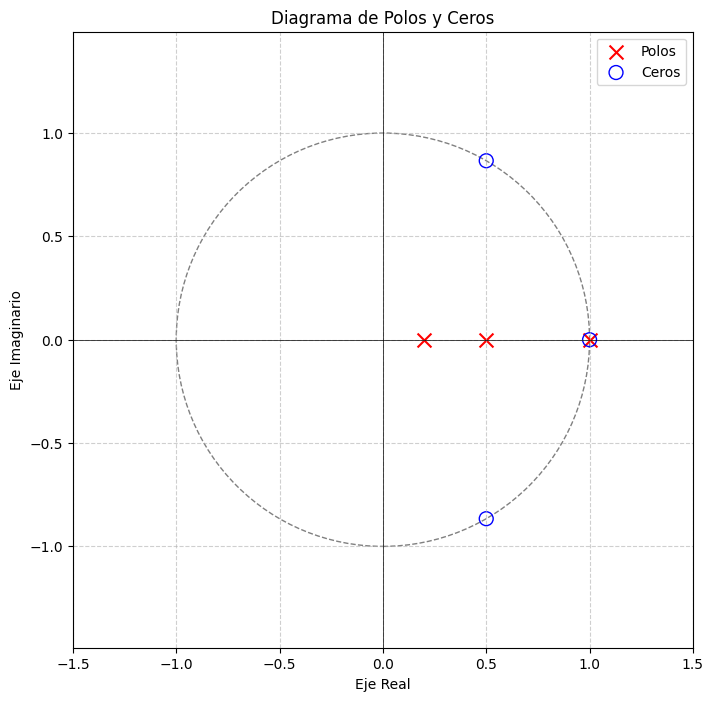

In [17]:
numerador = [1, -2, 2, -1]
denominador1 = [1, -1]      # (1 - z^-1)
denominador2 = [1, -0.5]    # (1 - 0.5z^-1)
denominador3 = [1, -0.2]    # (1 - 0.2z^-1)

# Multiplicar los polinomios del denominador
denominador_temp = np.polymul(denominador1, denominador2)
denominador = np.polymul(denominador_temp, denominador3)

coeff_df = pd.DataFrame({
    'Tipo': ['Numerador', 'Denominador'],
    'Coeficientes': [list(numerador), list(np.round(denominador, 4))]
})
display(coeff_df)

zeros = np.roots(numerador)
polos = np.roots(denominador)
polo_magnitud = np.abs(polos)

analysis_data = {
    'Polos': polos,
    'Magnitud del Polo': polo_magnitud,
    # Complejo se redondea para mejor visualización
    'Ceros': [f'{z.real:.4f} + {z.imag:.4f}j' for z in zeros]
}
analysis_df = pd.DataFrame(analysis_data)
display(analysis_df)

if np.all(polo_magnitud < 1):
    print(" El sistema es ESTABLE.")
elif np.any(polo_magnitud > 1):
    print("El sistema es INESTABLE (al menos un polo fuera del círculo unitario).")
else:
    print("El sistema es MARGINALMENTE ESTABLE (al menos un polo en el círculo unitario y ninguno fuera).")


R, P, K = residuez(numerador, denominador)

print("Resultados de la Expansión en Fracciones Parciales")
pfe_df = pd.DataFrame({
    'Polos (P)': P,
    'Residuos (R)': R
})
display(pfe_df)

print(f"Términos Directos (K): {K}")


plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='gray', facecolor='none', linestyle='--')
ax.add_patch(circ)
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='r', s=100, label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', s=100, facecolors='none', label='Ceros')
plt.title('Diagrama de Polos y Ceros')
plt.xlabel('Eje Real')
plt.ylabel('Eje Imaginario')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()